In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}
import numpy as np
import pandas as pd
import xarray as xr
import xarray.ufuncs as xu
import cmocean as cm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [4]:
dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw/'
dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/'
dir_figs = '/local/data/artemis/workspace/gloege/SOCAT-LE/results/figures_MS'

### SOCAT directory
#data_dir = f'{dir_raw}SOCAT'

In [5]:
reconstruction='SOMFFN'
ds = xr.open_dataset(f'{dir_raw}SOCAT/SOCATv5_tracks_gridded_monthly.nc')
ds_mask = xr.open_dataset(f'{dir_raw}SOCAT/SOCATv5_mask_198201-201701.nc')
#ds_stats = xr.open_dataset(f'{dir_clean}statistics_SOMFFN_CESM.nc')
ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux_stats/stats_FCO2_*_SOMFFN.nc', concat_dim='ensemble')

# Normalized Standard Deviation 

/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


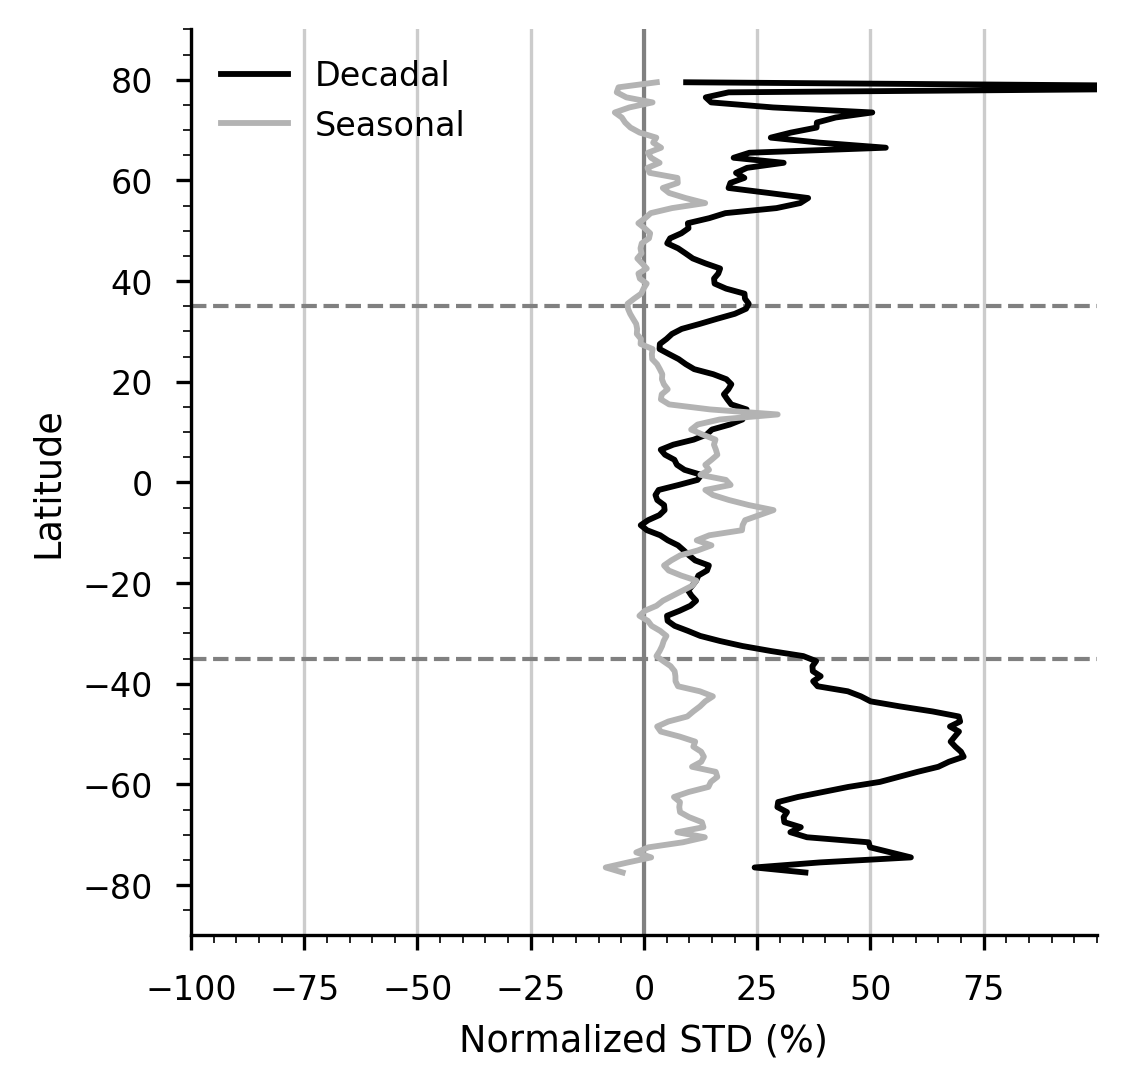

In [49]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    fig = plt.figure(figsize=(4,4)) 
    ax = fig.add_subplot(111)
    cmap = plt.cm.nipy_spectral
    cmap = cm.cm.oxy
    
    ## ------------------------------------
    ## Define data variables
    ## -----------------------------------
    corr_dec =  ds_stats['corr_dec'].mean(['ensemble','lon'])
    aae =  ds_stats['aae'].mean(['ensemble','lon'])
    bias = ds_stats['bias'].mean(['ensemble','lon'])
    std_star_seas = ds_stats['std-star_seasonal'].mean(['ensemble','lon'])
    std_star_res = ds_stats['std-star_residual'].mean(['ensemble','lon'])
    std_star_dec = ds_stats['std-star_dec'].mean(['ensemble','lon'])
    lat = ds_stats['lat']

    ## ------------------------------------
    ## 0 reference line
    ## -----------------------------------
    #ax.plot([0,168],[0,0],'--',color=[0.2, 0.2, 0.2], linewidth=1)
    ax.plot([-100,100],[-35,-35],'--',color=[0.5, 0.5, 0.5], linewidth=1)
    ax.plot([-100,100],[35,35],'--',color=[0.5, 0.5, 0.5], linewidth=1)
    ax.plot([0,0],[-90,90],'-',color=[0.5, 0.5, 0.5], linewidth=1)
    
    #sub = ax.scatter(nmonths, bias, s=20,
    #                 c=corr_dec, cmap=cmap, vmin=0, vmax=1, 
    #                linewidth=0.75, marker='o') 
    #sub.set_facecolor("none")
    ax.plot(std_star_dec*100, lat,color=[0,0,0], linestyle='-', label='Decadal')
    ax.plot(std_star_seas*100, lat, color=[0.7,0.7,0.7], linestyle='-', label='Seasonal')
    #ax.plot(std_star_res*100, lat, color=[0.9,0.9,0.9], linestyle='-', label='Sub-decadal')
    ## ------------------------------------
    ## axis limits and labels
    ## -----------------------------------
    ax.set_xlim(-100,100)
    ax.set_xticks(np.arange(-100, 100, 25))
    ax.set_ylim(-90,90)
    # fongsize was 20
    ax.set_xlabel('Normalized STD (%)')
    ax.set_ylabel('Latitude')
    #ax.xaxis.set_tick_params(labelsize=18)
    #ax.yaxis.set_tick_params(labelsize=18)

    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

    ax.legend(frameon=False)
#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# Correlation

/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


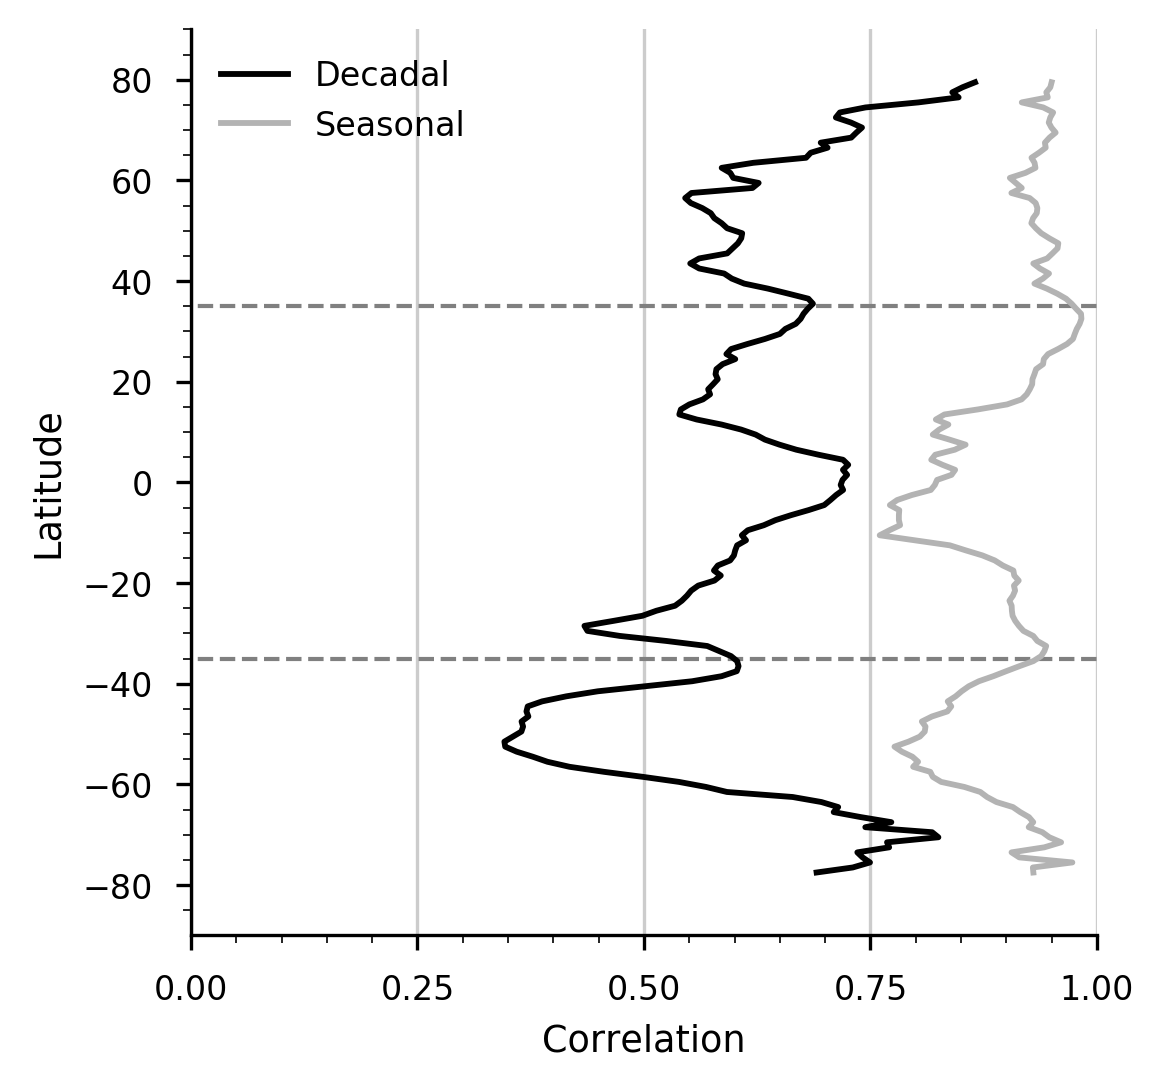

In [58]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    fig = plt.figure(figsize=(4,4)) 
    ax = fig.add_subplot(111)
    cmap = plt.cm.nipy_spectral
    cmap = cm.cm.oxy
    
    ## ------------------------------------
    ## Define data variables
    ## -----------------------------------
    corr_dec =  ds_stats['corr_dec'].mean(['ensemble','lon'])
    corr_res =  ds_stats['corr_residual'].mean(['ensemble','lon'])
    corr_seas =  ds_stats['corr_seasonal'].mean(['ensemble','lon'])
    aae =  ds_stats['aae'].mean(['ensemble','lon'])
    bias = ds_stats['bias'].mean(['ensemble','lon'])
    std_star_seas = ds_stats['std-star_seasonal'].mean(['ensemble','lon'])
    std_star_res = ds_stats['std-star_residual'].mean(['ensemble','lon'])
    std_star_dec = ds_stats['std-star_dec'].mean(['ensemble','lon'])
    lat = ds_stats['lat']

    ## ------------------------------------
    ## 0 reference line
    ## -----------------------------------
    #ax.plot([0,168],[0,0],'--',color=[0.2, 0.2, 0.2], linewidth=1)
    ax.plot([-100,100],[-35,-35],'--',color=[0.5, 0.5, 0.5], linewidth=1)
    ax.plot([-100,100],[35,35],'--',color=[0.5, 0.5, 0.5], linewidth=1)
    ax.plot([0,0],[-90,90],'-',color=[0.5, 0.5, 0.5], linewidth=1)
    
    #sub = ax.scatter(nmonths, bias, s=20,
    #                 c=corr_dec, cmap=cmap, vmin=0, vmax=1, 
    #                linewidth=0.75, marker='o') 
    #sub.set_facecolor("none")
    ax.plot(corr_dec, lat,color=[0,0,0], linestyle='-', label='Decadal')
    ax.plot(corr_seas, lat, color=[0.7,0.7,0.7], linestyle='-', label='Seasonal')
    #ax.plot(corr_res, lat, color=[0.9,0.9,0.9], linestyle='-', label='Sub-decadal')
    ## ------------------------------------
    ## axis limits and labels
    ## ----------------------------------
    ax.set_xticks(np.arange(-1, 1.2, 0.25))
    ax.set_xlim(0,1)
    ax.set_ylim(-90,90)
    # fongsize was 20
    ax.set_xlabel('Correlation')
    ax.set_ylabel('Latitude')
    #ax.xaxis.set_tick_params(labelsize=18)
    #ax.yaxis.set_tick_params(labelsize=18)

    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

    ax.legend(frameon=False)
#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)

# Bias

/home/gloege/miniconda3/envs/tensorflow/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


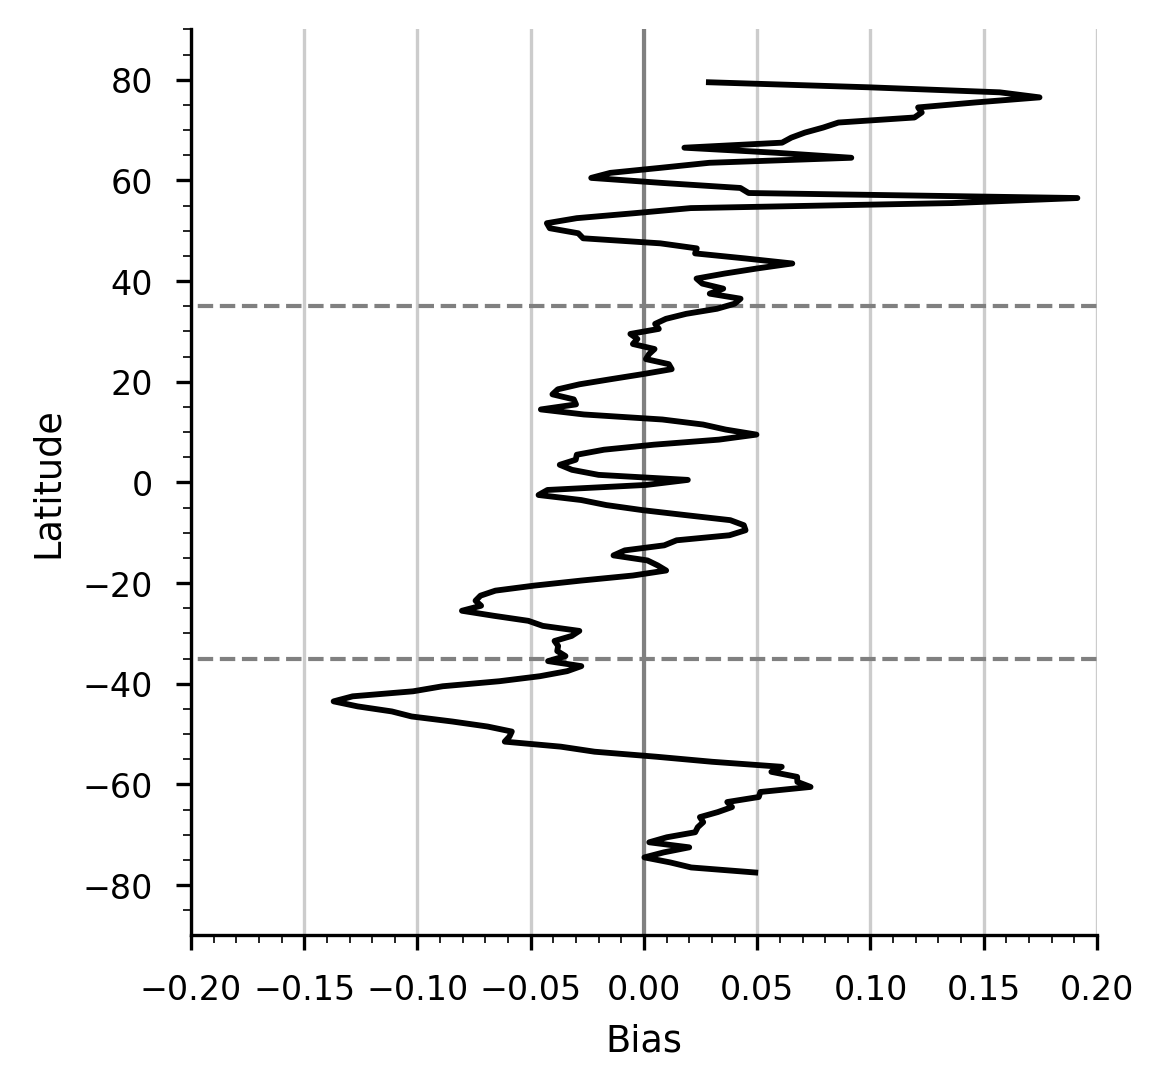

In [63]:
plot_style = 'seaborn-paper'

with plt.style.context(plot_style):
    fig = plt.figure(figsize=(4,4)) 
    ax = fig.add_subplot(111)
    cmap = plt.cm.nipy_spectral
    cmap = cm.cm.oxy
    
    ## ------------------------------------
    ## Define data variables
    ## -----------------------------------
    corr_dec =  ds_stats['corr_dec'].mean(['ensemble','lon'])
    corr_res =  ds_stats['corr_residual'].mean(['ensemble','lon'])
    corr_seas =  ds_stats['corr_seasonal'].mean(['ensemble','lon'])
    aae =  ds_stats['aae'].mean(['ensemble','lon'])
    bias = ds_stats['bias'].mean(['ensemble','lon'])
    std_star_seas = ds_stats['std-star_seasonal'].mean(['ensemble','lon'])
    std_star_res = ds_stats['std-star_residual'].mean(['ensemble','lon'])
    std_star_dec = ds_stats['std-star_dec'].mean(['ensemble','lon'])
    lat = ds_stats['lat']

    ## ------------------------------------
    ## 0 reference line
    ## -----------------------------------
    #ax.plot([0,168],[0,0],'--',color=[0.2, 0.2, 0.2], linewidth=1)
    ax.plot([-100,100],[-35,-35],'--',color=[0.5, 0.5, 0.5], linewidth=1)
    ax.plot([-100,100],[35,35],'--',color=[0.5, 0.5, 0.5], linewidth=1)
    ax.plot([0,0],[-90,90],'-',color=[0.5, 0.5, 0.5], linewidth=1)
    
    #sub = ax.scatter(nmonths, bias, s=20,
    #                 c=corr_dec, cmap=cmap, vmin=0, vmax=1, 
    #                linewidth=0.75, marker='o') 
    #sub.set_facecolor("none")
    ax.plot(bias, lat,color=[0,0,0], linestyle='-', label='Bias')
    #ax.plot(aae, lat, color=[0.7,0.7,0.7], linestyle='-', label='Mean-Absoluste-Error')
    #ax.plot(corr_res, lat, color=[0.9,0.9,0.9], linestyle='-', label='Sub-decadal')
    ## ------------------------------------
    ## axis limits and labels
    ## ----------------------------------
    ax.set_xticks(np.arange(-0.2, 0.22, 0.05))
    ax.set_xlim(-0.2,0.2)
    ax.set_ylim(-90,90)
    # fongsize was 20
    ax.set_xlabel('Bias')
    ax.set_ylabel('Latitude')
    #ax.xaxis.set_tick_params(labelsize=18)
    #ax.yaxis.set_tick_params(labelsize=18)

    
    ## ------------------------------------
    ## Modify axes
    ## -----------------------------------
    # Turn on the minor ticks
    # Turn off the display of all ticks.
    ax.tick_params(which='both', # Options for both major and minor ticks
                    top='off', # turn off top ticks
                    left='off', # turn off left ticks
                    right='off',  # turn off right ticks
                    bottom='off') # turn off bottom ticks


    ### Hide the right and top spines
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)

    ### major / minor tick lines
    #ax.minorticks_on()
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    #ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

    ### Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ## ------------------------------------
    ## Make plot square 
    ## and add grid lines
    ## -----------------------------------
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)

    #ax.legend(frameon=False)
#fig.savefig(f'{dir_figs}/bias_vs_nobs.pdf',bbox_inches='tight', dpi=300, pad_inches=0)